# Imports

In [ ]:
import pyxdf
import pandas as pd
import numpy as np
from glob import glob
import librosa
import datetime
import matplotlib.pyplot as plt
from utils import *

# Load Data

In [19]:
sub_files = glob('/Users/camilla.strauss/Desktop/CUNY_Data/Data/*/*.xdf')

In [ ]:
sub_number = 3
xdf_path = sub_files[sub_number]
sub_id = xdf_path.split('/')[6].split('-')[1]
mic_df = import_mic_data(xdf_path)
stim_df = import_stim_data(xdf_path)

srate = 1/mic_df.lsl_time_stamp.diff().median()

# Compare wav and LSL lengths

In [ ]:
# get wav file
wav_files = glob('/Users/camilla.strauss/Desktop/CUNY_Data/Data/*/*.wav')
wav_path = wav_files[sub_number]
wav_path

'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_task-CUNY_run-001_mic.wav'

In [30]:
# calculate wav and lsl durations
wav_dur = round(librosa.get_duration(path=wav_path), 3)
lsl_dur = round(mic_df['lsl_time_stamp'].iloc[-1]- mic_df['lsl_time_stamp'].iloc[0], 3)

# convert to hh:mm:ss
wav_dt = datetime.timedelta(seconds=wav_dur)
wav_dur_dt = str(datetime.timedelta(seconds=round(wav_dt.total_seconds())))
lsl_dt = datetime.timedelta(seconds=lsl_dur)
lsl_dur_dt = str(datetime.timedelta(seconds=round(lsl_dt.total_seconds())))


# make df of durations
variables = {name: [globals()[name], globals()[name+'_dt']]  for name in ['wav_dur', 'lsl_dur']}
durations_df = pd.DataFrame.from_dict(variables, orient = 'index', columns = ['seconds', 'mm:ss'])
print(durations_df.to_string() + '\n')

# print if they are close or not (margin on 5 seconds rn)
if abs(wav_dur - lsl_dur) > 5:
    print(f'Warning: The duration of the wav file ({wav_dur}) and the duration of the lsl time stamps ({lsl_dur}) differ by more than 5 seconds. \n')
    if wav_dur > lsl_dur:
        print('The wav file is longer than the lsl time stamps by {:.3f} seconds'.format(wav_dur - lsl_dur))
    if lsl_dur > wav_dur:
        print('The lsl time stamps are longer than the wav file by {:.3f} seconds'.format(lsl_dur - wav_dur))
else: 
    print('The wav file and the lsl time stamps are the same length!')

          seconds    mm:ss
wav_dur  1863.000  0:31:03
lsl_dur  1863.106  0:31:03

The wav file and the lsl time stamps are the same length!


In [31]:
dur_diff = abs(wav_dur - lsl_dur)
print(f'difference between wav file and lsl time stamps: {dur_diff:.3f}')

difference between wav file and lsl time stamps: 0.106


# Range

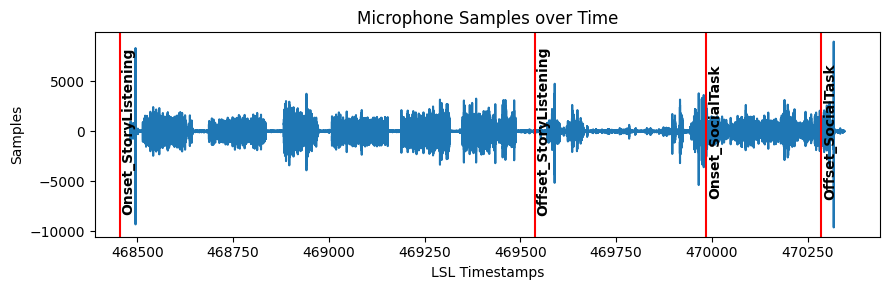

In [32]:
plt.figure(figsize=(9, 3))
plt.plot(mic_df.lsl_time_stamp, mic_df.int_array)
for event in stim_df.loc[stim_df.event.str.contains('StoryListening|SocialTask')].iterrows():
    plt.axvline(event[1]['lsl_time_stamp'], color='r')
    plt.text(event[1]['lsl_time_stamp']+4, 0, event[1]['event'], rotation=90, verticalalignment='center', fontweight = 'bold')

plt.xlabel('LSL Timestamps')
plt.ylabel('Samples')
plt.title('Microphone Samples over Time')
plt.tight_layout()
plt.savefig(f'report_images/{sub_id}_mic_lineplot.png')
plt.show()

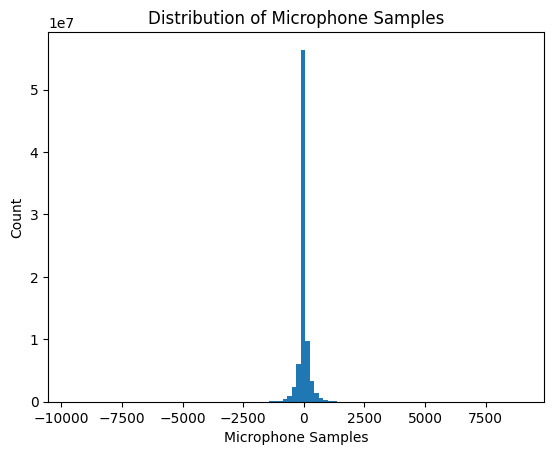

In [ ]:
plt.hist(mic_df['int_array'], bins=100)
plt.xlabel('Microphone Samples')
plt.ylabel('Count')
plt.title('Distribution of Microphone Samples')
plt.savefig(f'report_images/{sub_id}_mic_histogram.png')
plt.show()

## Stats that might not be included


In [ ]:
# 25% and 75% quantiles
quan25 = np.quantile(mic_df['int_array'], 0.25)
quan75 = np.quantile(mic_df['int_array'], 0.75)

if quan75 - quan25 > 100:
    print('range is really large??')
print('first quartile: {} \nsecond quartile: {}'.format(quan25, quan75))

# standard dev
print("standard deviation: {:.3f}".format(mic_df['int_array'].std()))

# range, should be between -32768 and 32767
print("min: ", min(mic_df.int_array), "\nmax: ", max(mic_df.int_array))

first quartile: -30.0 
second quartile: 29.0
standard deviation: 212.9577
min:  -9616 
max:  8985


In [37]:
# no of NA's
num_NaN = mic_df['int_array'].isna().sum()
percent_NaN = num_NaN/len(mic_df)
print(f"number of NaN's: {num_NaN} \n\
percent of NaN's: {percent_NaN:.3%}")


number of NaN's: 0 
percent of NaN's: 0.000%


# Reported Variables

In [39]:
print(f'effective sampling rate: {srate:.3f}')
print(f'difference between wav file and lsl time stamps: {dur_diff:.3f}')
print(f"number of NaN's: {num_NaN} \n\
percent of NaN's: {percent_NaN:.3%}")
print('first quartile: {} \nsecond quartile: {}'.format(quan25, quan75))
# standard dev
print("standard deviation: {:.3f}".format(mic_df['int_array'].std()))
# range, should be between -32768 and 32767
print("min: ", min(mic_df.int_array), "\nmax: ", max(mic_df.int_array))

effective sampling rate: 44097.532
difference between wav file and lsl time stamps: 0.106
number of NaN's: 0 
percent of NaN's: 0.000%
first quartile: -30.0 
second quartile: 29.0
standard deviation: 212.958
min:  -9616 
max:  8985
